# Gaussian process surrogate modelling 

## One-dimensional GP regression
### Generating training data

Below we generate a noiseless training data set for $f(x) = \sin(x)$, specifically $f$ at uniform grid on $[0,L]$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# Generate noiseless training data where underlying f is sine.
N_train = 20
L = 20
#X_train = np.zeros([N_train, D])
X_train = np.linspace(0, L, N_train)

Y_train = np.sin(X_train)


# Plot training data
fig, ax = subplots(1, 1, figsize = (10, 10))
ax.plot(X_train, Y_train, '*', label = 'training points')
ax.plot(np.linspace(0, L, 100), np.sin(np.linspace(0, L, 100)), 'k-', label = 'f')
ax.set_xlabel(r'$X$', fontsize = 16)
ax.set_ylabel(r'$f(X)$', fontsize = 16)
ax.legend(loc = 'best')
plt.show()

### Fitting a GP through test points

Below we choose a set of x-values, $\textbf{X}^{*}$, for which we will generate random approximations of $f(\textbf{X}^{*})$, based on a Gaussian process fitted to the training data created above.

In [ ]:
### Choosing X* for which I want to approximate f(X*).

#X_star = np.array((3.2, 6.2, 12.5, 15.5))
N_star = 7 # Number of test points
X_star = L * np.random.rand(N_star) # Test points
#N_star = X_star.shape[0]

### Constructing covariance matrix, K, with elements given by k(x_1,x_2), the 'squared exponential' cov kernel.
X = np.concatenate((X_train, X_star))
#cov = lambda x_1, x_2: np.exp(-0.5 * np.transpose(x_1 - x_2) * (x_1 - x_2))    # squared exp. cov
cov = lambda x_1, x_2: np.exp(-0.5 * abs((x_1 - x_2)))     # exp. cov

N = N_train + N_star
K = zeros([N, N])
for i in range(N):
    for j in range(N):
        K[i, j] = cov(X[i], X[j])
        
# Decomposing K for calulation of mean and cov of f(X*).
k = K[: N_train, : N_train] # k(X_train, X_train): covariance between training data and training data.
k_star = K[ N_train :, : N_train] # k(X_star, X_train): covariance between training data and X*.
k_starstar = K[N_train : , N_train : ] # k(X_star, X_star): covariance between X* and X*.

# Calulation of mean and cov of f(X*).
k_inv = np.linalg.inv(k) # Inverse of k need only be calculated once
mean_f_x_star = k_star @ k_inv @ Y_train
V = k_starstar - k_star @ k_inv @ k_star.T

# Plot training data alongside generated f(X*).
fig, ax = subplots(1, 1, figsize = (10, 10))
ax.plot(X_train, Y_train, '*', label = 'training points')
ax.plot(X_star, mean_f_x_star, 'go', label = 'E[f(X*)] (with error bars)')
ax.plot(np.linspace(0, L, 100), np.sin(np.linspace(0, L, 100)), 'k-', label = 'f')
ax.set_xlabel(r'$X$', fontsize = 16)
ax.set_ylabel(r'$f(X)$', fontsize = 16)
ax.errorbar(X_star, mean_f_x_star, yerr=np.diag(V), fmt='go')
ax.legend(loc = 'best')
plt.show()


### Troubleshooting

print("Condition number of k = ", np.linalg.cond(k))
print("X* = ", X_star)
print("E[f(X*)] = ",mean_f_x_star)
print("V(f(X*)) = ", diag(V))
print("True f(X*) = ", np.sin(X_star))
# print("eigenvalues of k = ", np.linalg.eig(k)[0])
# print("eigenvalues of V = ", np.linalg.eig(V)[0])
# print(X)

## Multi-dimensional GP regression
### Generating training data

We want to do GP regression on noiseless "data" from an underlying function, $f:\mathbb{R}^{D}\rightarrow\mathbb{R}$.

Here we create a uniform grid in $[0,1]^D$, take as an example $f(X) = \exp\left(-X^T X\right)$, and evaluate $f$ at the grid points to create training data.

***Make sure to restart kernel between running 1-D and multi-D codes.***

## Single run
Use the two cells below to implement GP regression for a single fixed choice of D and N (training points per dimension).
### Generating training data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

D = 2 # Number of dimensions.
N = 20 # Number of points along each dimension in grid.

### Create uniform grid points on [0,1]^D.

X = np.linspace(np.zeros(D), np.ones(D), N) # Each column is list of grid-points for each dimension.
Xs = np.hsplit(X, D) # Just for syntax: change array to tuple of vectors.
XDarray = np.array(np.meshgrid(*Xs)) # Has shape (D, N, ..., N), w. D axes of length N.

Yarray = np.zeros(np.repeat(N, D))
#Yarray = np.exp(-(np.sum(XDarray, axis = 0)) ** 2) # Has shape (N, ..., N), w. D axes of length N.
Yarray = np.exp(-np.sum(np.power(XDarray, 2), axis = 0)) # Has shape (N, ..., N), w. D axes of length N.

# f = lambda x: np.exp(-np.transposex.T @ x)
# Yarray = f(XDarray)

X_train = np.reshape(XDarray, (D, N ** D)) # Store coordinates of training points in a "list".
Y_train = np.reshape(Yarray, N ** D) # Store training point function evaluations in a "list".
N_train = N ** D # Total number of training points.


### Fitting a GP through test points

In [19]:
#X_train, Y_train, N_train, D, N = train(D,N)


# Choosing X* for which I want to approximate f(X*).
N_star = 2
X_star = np.random.rand(D, N_star)
# X_star = np.ones((D, 1)) * 0.4321
print("X* = ", X_star)

# Constructing covariance matrix, K, with elements given by k(x_1,x_2), the 'squared exponential' cov kernel.
Xs = np.concatenate((X_train, X_star), axis = 1)

cov = lambda x_1, x_2: np.exp(-0.5 * np.linalg.norm((x_1 - x_2), 2) ** 2)    # squared exp. cov
#cov = lambda x_1, x_2: np.exp(-0.5 * np.linalg.norm((x_1 - x_2), 2))     # exp. cov
vCov = np.vectorize(cov)

N = N_train + N_star
K = np.zeros([N, N])
      
# for i in range(N):
#     for j in range(N):
#         K[i, j] = cov(Xs[:, i], Xs[:, j])

for i  in range(N):
    delta = Xs[:,i:(i+1)] - Xs
    K[:,i] = np.exp(-np.sum(delta ** 2, 0) ** 0.5)
        
# Decomposing K for calulation of mean and cov of f(X*).
k = K[: N_train, : N_train] # k(X_train, X_train): covariance between training data and training data.
k_star = K[ N_train :, : N_train] # k(X_star, X_train): covariance between training data and X*.
k_starstar = K[N_train : , N_train : ] # k(X_star, X_star): covariance between X* and X*.

# Calulation of mean and cov of f(X*).
k_inv = np.linalg.inv(k + 0 * (10 ** -11) * np.identity(N_train)) # Inverse of K need only be calculated once

mean_f_x_star = k_star @ k_inv @ Y_train.T
print("E[f(X*)] = ",mean_f_x_star)
# V = k_starstar - k_star @ k_inv @ k_star.T
# print("V(f(X*)) = ", diag(V))

print("condition number of K = ", np.linalg.cond(K))
#print("condition number of k = ", np.linalg.cond(k))

X* =  [[0.26890009 0.21001745]
 [0.79567102 0.63285198]]
E[f(X*)] =  [0.4939048  0.64107279]
condition number of K =  178838.6627844933


Squared exponential cov kernel typically results in smaller condition number of K than gaussian kernel, however, gaussian kernel typically leads to smaller relativ error.

In [20]:
#Y_star = np.exp(-(np.sum(X_star, axis = 0) ** 2))
Y_star = np.exp(-np.sum(np.power(X_star, 2), axis = 0))
print("True f(X*) = ", Y_star)

MeanRelError = np.mean(np.abs(mean_f_x_star - Y_star)/Y_star) # mean is taken over set of test points
print("Mean Relative error = ", MeanRelError)

True f(X*) =  [0.49391115 0.64107491]
Mean Relative error =  8.082079999944125e-06


Implement sparse grid for training data. Look at decay of error for single test point while fixing dimension and refining training grid.

In [ ]:
#print("eigenvalues of k = ", np.linalg.eig(k)[0])

## Convergence analysis
The function in the cell below, GP(D, Nd, N_star), implement GP regression for a given dimension, D, and number of point along each dimension of the grid, Nd, and number of test points, N_star, returning the mean relative error. In the following cells GP(D, Nd, N_star) is used to study convergence of the relative error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})
from pylab import *
import time

def GP(D, Nd, N_star):
    ### Create uniform grid points on [0,1]^D.

    tStart = time.time()
    X = np.linspace(np.zeros(D), np.ones(D), Nd) # Each column is list of grid-points for each dimension.
    Xs = np.hsplit(X, D) # Just for syntax: change array to tuple of vectors.
    XDarray = np.array(np.meshgrid(*Xs)) # Has shape (D, N,..., N), w. D axes of length Nd.

    Yarray = np.zeros(np.repeat(Nd, D))
    # Yarray = np.exp(-(np.sum(XDarray, axis = 0)) ** 2) # Has shape (N,..., N), w. D axes of length Nd.
    Yarray = np.exp(-np.sum(np.power(XDarray, 2), axis = 0)) # Has shape (N, ..., N), w. D axes of length Nd.

    X_train = np.reshape(XDarray, (D, Nd ** D)) # Store coordinates of training points in a "list".
    Y_train = np.reshape(Yarray, Nd ** D) # Store training point function evaluations in a "list".
    N_train = Nd ** D # Total number of training points.
    
    print("Gen Took {} min".format((time.time()-tStart)/60.)); tStart=time.time();
    # Choosing X* for which I want to approximate f(X*).
    #N_star = 20
    X_star = np.random.rand(D, N_star)
    # X_star = np.ones((D, 1)) * 0.4321
    # print("X* = ", X_star)

    # Constructing covariance matrix, K, with elements given by k(x_1,x_2), the 'squared exponential' cov kernel.
    Xs = np.concatenate((X_train, X_star), axis = 1)

    # cov = lambda x_1, x_2: np.exp(-0.5 * np.linalg.norm((x_1 - x_2), 2) ** 2)    # squared exp. cov
    cov = lambda x_1, x_2: np.exp(-0.5 * np.linalg.norm((x_1 - x_2), 2))     # exp. cov

    N = N_train + N_star
    K = np.zeros([N, N])

#     for i in range(N):
#         for j in range(N):
#             K[i, j] = cov(Xs[:, i], Xs[:, j])
            
    for i  in range(N):
        delta = Xs[:,i:(i+1)] - Xs
        K[:,i] = np.exp(-np.sum(delta ** 2, 0) ** 0.5)
    
    print("Cov Took {} min".format((time.time()-tStart)/60.)); tStart=time.time();
    
    # Decomposing K for calulation of mean and cov of f(X*).
    k = K[: N_train, : N_train] # k(X_train, X_train): covariance between training data and training data.
    k_star = K[ N_train :, : N_train] # k(X_star, X_train): covariance between training data and X*.
    k_starstar = K[N_train : , N_train : ] # k(X_star, X_star): covariance between X* and X*.

    # Calulation of mean and cov of f(X*).
    k_inv = np.linalg.inv(k + 1 * (10 ** -15) * np.identity(N_train)) # Inverse of K need only be calculated once

    print("Inv Took {} min".format((time.time()-tStart)/60.)); tStart=time.time();
    
    mean_f_x_star = k_star @ k_inv @ Y_train.T
    #V = k_starstar - k_star @ k_inv @ k_star.T
    
    # Y_star = np.exp(-(np.sum(X_star, axis = 0) ** 2))
    Y_star = np.exp(-np.sum(np.power(X_star, 2), axis = 0))
    
    MeanRelError = np.mean(np.abs(mean_f_x_star - Y_star)/Y_star)
    RMSE = np.sqrt(np.sum(np.power(mean_f_x_star - Y_star, 2))) / N_star
    print("MRE = ", MeanRelError)
    print("RMSE = ", RMSE)
    print("Mean of GP took {} min".format((time.time()-tStart)/60.)); tStart=time.time();
    # return(MeanRelError, np.linalg.cond(K))
    return(MeanRelError, RMSE)

### Convergence in 1D

In [68]:
totStart = time.time();
D = 1
ns = np.arange(400,4400,400)
nn = ns.size

N_star = 250

MeanRelError = np.zeros(nn)
RMSE = np.zeros(nn)
variance = np.zeros(nn)
#condK = np.zeros(nn)

for i in range(nn):
#     MeanRelError[i], condK[i] = GP(D, ns[i], N_star)
    MeanRelError[i], RMSE[i] = GP(D, ns[i], N_star)
print("Entire code took {} min: ".format((time.time()-totStart)/60.));

Gen Took 1.1972586313883464e-05 min
Cov Took 0.0005601843198140463 min
Inv Took 9.876887003580729e-05 min
MRE =  1.0317848923875428e-06
RMSE =  7.253750501598153e-08
Mean of GP took 3.637075424194336e-05 min
Gen Took 2.019802729288737e-05 min
Cov Took 0.0013917446136474609 min
Inv Took 0.0005831480026245117 min
MRE =  2.4576440035978786e-07
RMSE =  1.7411689530500415e-08
Mean of GP took 8.07960828145345e-05 min
Gen Took 1.5552838643391927e-05 min
Cov Took 0.0025903503100077312 min
Inv Took 0.001571206251780192 min
MRE =  1.0817265124967075e-07
RMSE =  7.661455842739666e-09
Mean of GP took 0.0001630981763203939 min
Gen Took 2.1127859751383462e-05 min
Cov Took 0.0035755157470703123 min
Inv Took 0.0036147554715474446 min
MRE =  6.105453006807035e-08
RMSE =  4.265479542701389e-09
Mean of GP took 0.00034118096033732096 min
Gen Took 2.0825862884521483e-05 min
Cov Took 0.005736796061197916 min
Inv Took 0.006814110279083252 min
MRE =  3.862802802737619e-08
RMSE =  2.730237440993515e-09
Mean of

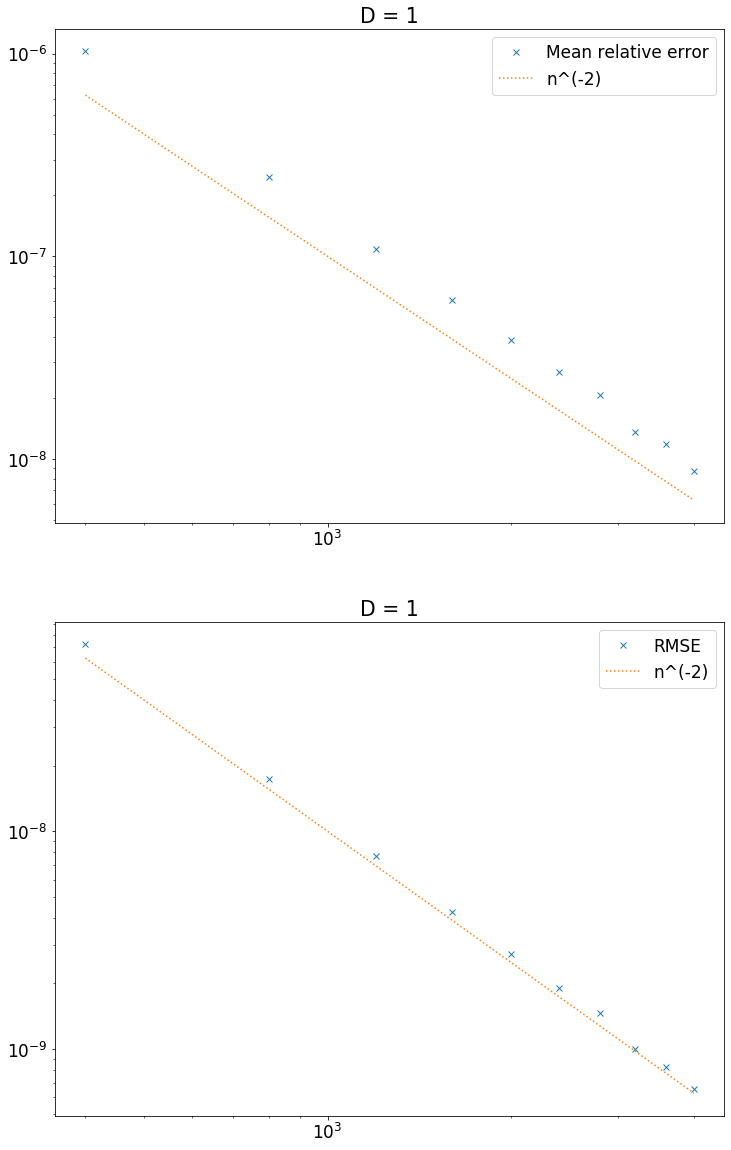

In [70]:
fig, axs = plt.subplots(2, 1, figsize=(12, 20))
axs = axs.ravel()

axs[0].loglog(ns**D, MeanRelError, 'x', label='Mean relative error')
axs[0].loglog(ns**D, 1e-1 * (ns**D)**-2., ':', label='n^(-2)')
axs[0].legend() # turn on legend
axs[0].set_title('D = '+str(D))

axs[1].loglog(ns**D, RMSE, 'x', label='RMSE')
axs[1].loglog(ns**D, 1e-2 * (ns**D)**-2., ':', label='n^(-2)')
axs[1].legend() # turn on legend
axs[1].set_title('D = '+str(D))



# axs[0].loglog(ns**D, MeanRelError, 'x', label='Mean relative error')
# axs[0].loglog(ns**D, 1e-1 * (ns**D)**-2., ':', label='n^(-2)')
# axs[0].legend() # turn on legend
# axs[0].set_title('D = '+str(D))

# axs[1].loglog(ns**D, condK, 'x', label='Cond(K)')
# axs[1].legend() # turn on legend
# axs[1].set_title('D = '+str(D))

plt.show()

### Convergence in 2D

In [10]:
totStart = time.time();
D = 2

oneD_max = 4000
nInc = 10
mD_inc = np.ceil(np.power(oneD_max, 1 / D) / nInc)

ns = np.arange(mD_inc, (nInc + 1) * mD_inc, mD_inc)
nn = ns.size
print("points per dimension: ", ns)

N_star = 250

MeanRelError = np.zeros(nn)
RMSE = np.zeros(nn)
variance = np.zeros(nn)
#condK = np.zeros(nn)

for i in range(nn):
    # RelError[i], condK[i] = GP(D, ns[i])
    MeanRelError[i], RMSE[i] = GP(D, int(ns[i]), N_star)
print("Entire code took {} min: ".format((time.time()-totStart)/60.));

points per dimension:  [ 7. 14. 21. 28. 35. 42. 49. 56. 63. 70.]
Gen Took 1.1070569356282551e-05 min
Cov Took 0.00021190643310546874 min
Inv Took 1.2163321177164713e-05 min
MRE =  0.0015163420009460366
RMSE =  5.6626733580425574e-05
Mean of GP took 1.4213720957438151e-05 min
Gen Took 7.812182108561198e-06 min
Cov Took 0.00037190516789754234 min
Inv Took 2.6440620422363283e-05 min
MRE =  0.0003185202093716016
RMSE =  2.068928696420506e-05
Mean of GP took 1.4233589172363282e-05 min
Gen Took 2.1445751190185548e-05 min
Cov Took 0.0007996439933776855 min
Inv Took 0.00011512438456217448 min
MRE =  0.00013818798484656458
RMSE =  1.0999391294518164e-05
Mean of GP took 3.809134165445964e-05 min
Gen Took 2.2490819295247395e-05 min
Cov Took 0.0013786514600118002 min
Inv Took 0.0004385828971862793 min
MRE =  7.033829619015186e-05
RMSE =  5.247762316386457e-06
Mean of GP took 0.00010540882746378581 min
Gen Took 2.244710922241211e-05 min
Cov Took 0.002600661913553874 min
Inv Took 0.00172911485036214

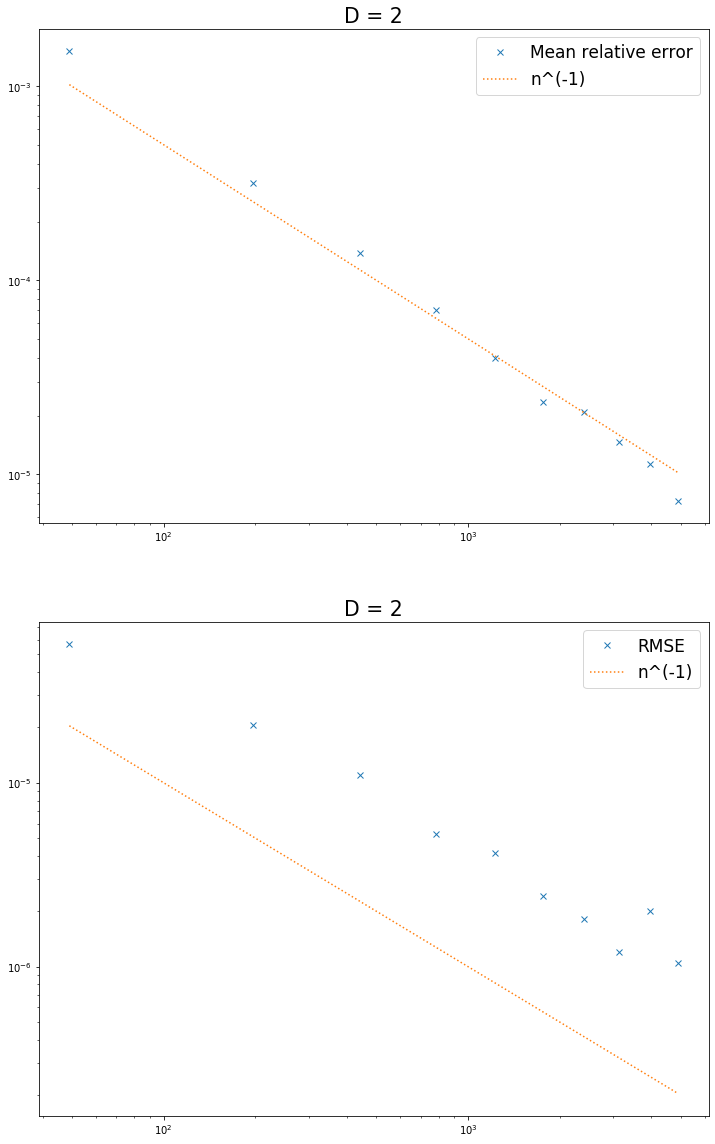

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(12, 20))
axs = axs.ravel()
plt.rcParams.update({'font.size': 17})

# axs.loglog(ns**D, MeanRelError, 'x', label='Relative error')
# axs.loglog(ns**D, 2*1e-1 * (ns**D)**-1.3, ':', label='n^(-1.3)')
# axs.legend() # turn on legend
# axs.set_title('D = '+str(D))

axs[0].loglog(ns**D, MeanRelError, 'x', label='Mean relative error')
axs[0].loglog(ns**D, .5*1e-1 * (ns**D)**-1., ':', label='n^(-1)')
axs[0].legend() # turn on legend
axs[0].set_title('D = '+str(D))

axs[1].loglog(ns**D, RMSE, 'x', label='RMSE')
axs[1].loglog(ns**D, 1e-3 * (ns**D)**-1., ':', label='n^(-1)')
axs[1].legend() # turn on legend
axs[1].set_title('D = '+str(D))

# axs[0].loglog(ns**D, RelError, 'x', label='Relative error')
# axs[0].loglog(ns**D, 1e-1 * (ns**D)**-1., ':')
# axs[0].legend() # turn on legend
# axs[0].set_title('D = '+str(D))

# axs[1].loglog(ns**D, condK, 'x', label='Cond(K)')
# axs[1].legend() # turn on legend
# axs[1].set_title('D = '+str(D))

plt.show()

### Convergence in D dimensions

In [24]:
totStart = time.time();

D = 3

oneD_max = 4000
nInc = 10

mD_inc = np.ceil(np.power(oneD_max, 1 / D) / nInc)
ns = np.arange(mD_inc, (nInc + 1) * mD_inc, mD_inc)
# ns = np.array((1,2,3,4,5,6))
nn = ns.size
print("points per dimension: ", ns)

N_star = 1000

MeanRelError = np.zeros(nn)
RMSE = np.zeros(nn)
variance = np.zeros(nn)
#condK = np.zeros(nn)

for i in range(nn):
    # RelError[i], condK[i] = GP(D, ns[i])
    MeanRelError[i], RMSE[i] = GP(D, int(ns[i]), N_star)
print("Entire code took {} min: ".format((time.time()-totStart)/60.));

points per dimension:  [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
Gen Took 1.883109410603841e-05 min
Cov Took 0.0012603123982747396 min
Inv Took 1.6927719116210937e-06 min
MRE =  0.1582047315793499
RMSE =  0.0030922625094563314
Mean of GP took 2.0595391591389976e-05 min
Gen Took 1.2278556823730469e-05 min
Cov Took 0.0016362349192301433 min
Inv Took 1.0895729064941407e-05 min
MRE =  0.005044869963742404
RMSE =  7.139059369262193e-05
Mean of GP took 1.3343493143717448e-05 min
Gen Took 1.9490718841552734e-05 min
Cov Took 0.002868366241455078 min
Inv Took 5.984306335449219e-05 min
MRE =  0.002123046115330614
RMSE =  3.9456894693908474e-05
Mean of GP took 6.968975067138672e-05 min
Gen Took 4.695256551106771e-05 min
Cov Took 0.006398606300354004 min
Inv Took 0.0002924799919128418 min
MRE =  0.0009573244888490869
RMSE =  2.5066940782928584e-05
Mean of GP took 0.00022159814834594728 min
Gen Took 3.899733225504557e-05 min
Cov Took 0.006265918413798015 min
Inv Took 0.00124131441116333 min
MRE =  

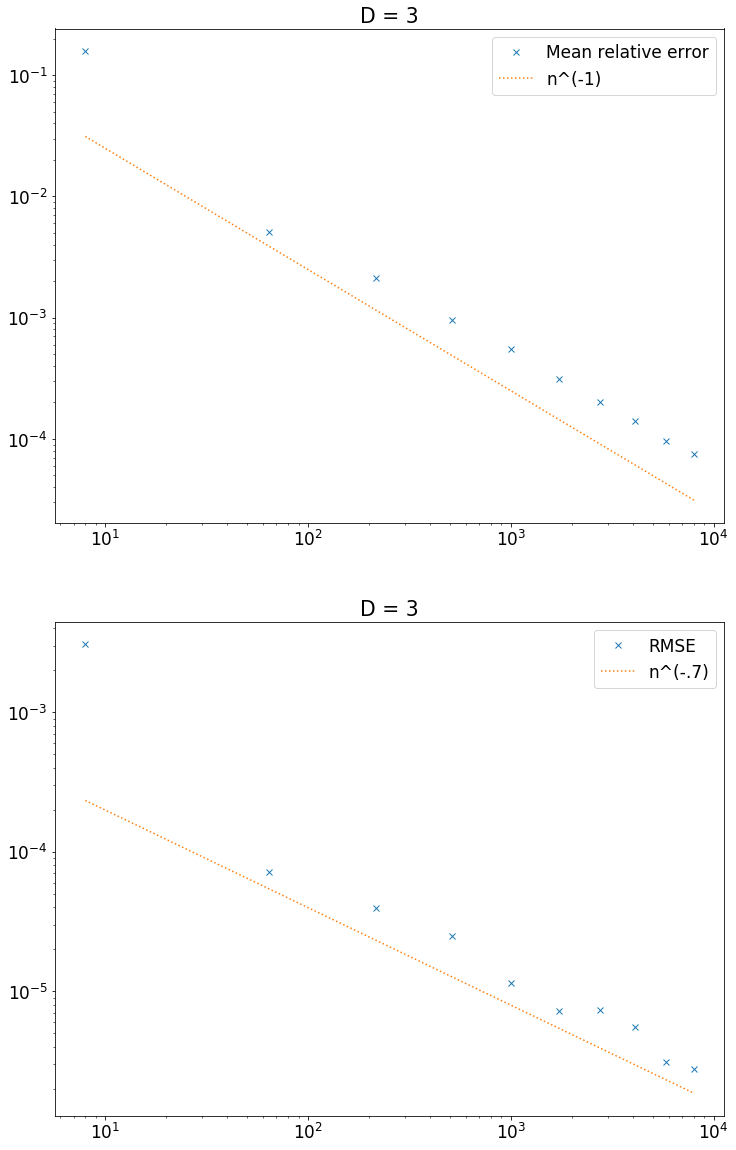

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(12, 20))
axs = axs.ravel()
plt.rcParams.update({'font.size': 17})

# axs.loglog(ns**D, MeanRelError, 'x', label='Relative error')
# axs.loglog(ns**D, 2*1e-1 * (ns**D)**-1.3, ':', label='n^(-1.3)')
# axs.legend() # turn on legend
# axs.set_title('D = '+str(D))

axs[0].loglog(ns**D, MeanRelError, 'x', label='Mean relative error')
axs[0].loglog(ns**D, 0.25*1e0 * (ns**D)**-1., ':', label='n^(-1)')
axs[0].legend() # turn on legend
axs[0].set_title('D = '+str(D))

axs[1].loglog(ns**D, RMSE, 'x', label='RMSE')
axs[1].loglog(ns**D, 1e-3 * (ns**D)**-.7, ':', label='n^(-.7)')
axs[1].legend() # turn on legend
axs[1].set_title('D = '+str(D))

# axs[1].loglog(ns**D, condK, 'x', label='Cond(K)')
# axs[1].legend() # turn on legend
# axs[1].set_title('D = '+str(D))

plt.show()